In [129]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

load data

In [130]:
# source_name = 'qu_solar_PV_Power00-19.csv'
d1 = pd.read_csv('results_df/WPELECTP_B.csv', index_col=0) # Wind and solar share electricity production%
d2 = pd.read_csv('old_result_df/preva_inten.csv', index_col=0) # Energy intensity level of primary energy (MJ/2011 USD PPP)
df = pd.merge(d1, d2)

In [131]:
df

,Country,Years,Wind and solar share electricity production,Energy intensity level of primary energy (MJ/2011 USD PPP) [6.1_PRIMARY.ENERGY.INTENSITY]
0,Germany,2000.0,1.63,4.635294
1,United States,2000.0,0.52,7.335371
2,China,2000.0,0.06,10.233051
3,India,2000.0,0.30,6.949595
4,Germany,2001.0,1.80,4.694757
...,...,...,...,...
59,India,2014.0,3.27,4.960149
60,Germany,2015.0,18.53,3.603094
61,United States,2015.0,5.86,5.408393
62,China,2015.0,3.94,6.690070


In [132]:
df['Years'].unique()

array([2000., 2001., 2002., 2003., 2004., 2005., 2006., 2007., 2008.,
       2009., 2010., 2011., 2012., 2013., 2014., 2015.])

In [133]:
df['Country'].unique()

array(['Germany', 'United States', 'China', 'India'], dtype=object)

In [134]:
df.columns

Index(['Country', 'Years', 'Wind and solar share electricity production',
       'Energy intensity level of primary energy (MJ/2011 USD PPP) [6.1_PRIMARY.ENERGY.INTENSITY]'],
      dtype='object')

In [135]:
df=df.rename(columns={'Energy intensity level of primary energy (MJ/2011 USD PPP) [6.1_PRIMARY.ENERGY.INTENSITY]':'Energy intensity (MJ/2011 USD PPP)'})
#df=df.rename(columns={'Total electricity output (GWh) [4.1.1_TOTAL.ELECTRICITY.OUTPUT]':'Total electricity output (GWh)'})

In [136]:
df

,Country,Years,Wind and solar share electricity production,Energy intensity (MJ/2011 USD PPP)
0,Germany,2000.0,1.63,4.635294
1,United States,2000.0,0.52,7.335371
2,China,2000.0,0.06,10.233051
3,India,2000.0,0.30,6.949595
4,Germany,2001.0,1.80,4.694757
...,...,...,...,...
59,India,2014.0,3.27,4.960149
60,Germany,2015.0,18.53,3.603094
61,United States,2015.0,5.86,5.408393
62,China,2015.0,3.94,6.690070


build plots for the countries we research

In [137]:
df.columns

Index(['Country', 'Years', 'Wind and solar share electricity production',
       'Energy intensity (MJ/2011 USD PPP)'],
      dtype='object')

In [138]:
#dfg = df.groupby('Years').mean()
dfg = df[df['Country'] == 'India']
dfg = dfg.reset_index()

In [139]:
dfg['Years']

0     2000.0
1     2001.0
2     2002.0
3     2003.0
4     2004.0
5     2005.0
6     2006.0
7     2007.0
8     2008.0
9     2009.0
10    2010.0
11    2011.0
12    2012.0
13    2013.0
14    2014.0
15    2015.0
Name: Years, dtype: float64

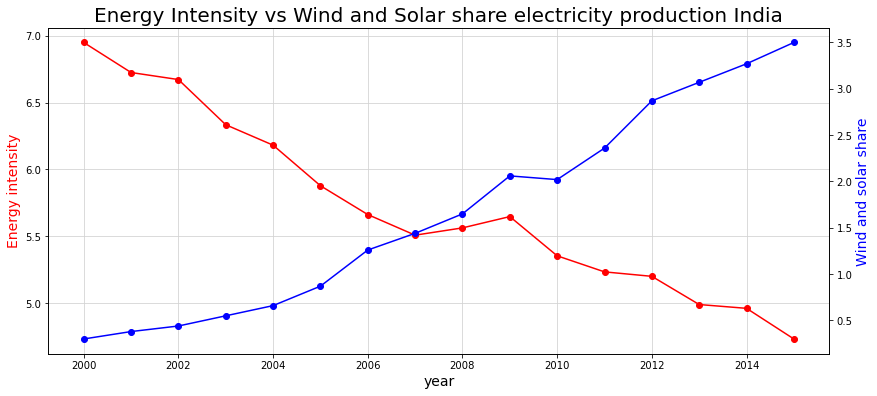

In [140]:

# create figure and axis objects with subplots()
fig,ax = plt.pyplot.subplots(1,1, figsize=(14,6))
ax.grid(color='lightgrey')

# make a plot
ax.plot(dfg['Years'], dfg['Energy intensity (MJ/2011 USD PPP)'], color="red", marker="o")
# set x-axis label
ax.set_xlabel("year",fontsize=14)
# set y-axis label
ax.set_ylabel("Energy intensity",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(dfg['Years'], dfg['Wind and solar share electricity production'],color="blue",marker="o")
ax2.set_ylabel("Wind and solar share",color="blue",fontsize=14)
ax.set_title('Energy Intensity vs Wind and Solar share electricity production India', size = 20)

plt.pyplot.show()

# save the plot as a file
fig.savefig('Energy Intensity vs Wind and Solar share electricity production India.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')